In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os, sys
import numpy as np
from collections import OrderedDict as OD
import math
#import uproot3
import uproot as uproot
import hist
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import enum
import mplhep as hep
from parse import *

#from HistogramListForPlottingDataVsMC_TriggerStudy_GGFMode import *
#from HistogramListForPlottingDataVsMC_Analysis_GGFMode import *
from HistogramListForPlottingDataVsMC_Analysis_Example import *

sys.path.insert(1, '../') # to import file from other directory (../ in this case)

from htoaa_Settings import *

class DataBlindingOptions(enum.Enum):
    BlindPartially = '(partially blind)'
    BlindFully     = '(blind)'
    Unblind        = ' '


#sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20230831_SelPNetMDXbbNSV/2018/analyze_htoaa_stage1.root'
#sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20230831_SelPNetMDXbbNSV/2018/plots'
#sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20230921_SFPNetMDXbbvsQCD/2018/analyze_htoaa_stage1.root'
#sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20230921_SFPNetMDXbbvsQCD/2018/plots'
#sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20230922_DataSplitByEra/2018/analyze_htoaa_stage1.root'
#sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20230922_DataSplitByEra/2018/plots'
#sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20231019_PNetTaggerSignScan/2018/analyze_htoaa_stage1.root'
#sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20231019_PNetTaggerSignScan/2018/plots2'
sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20231012_TrigEffiStudy/2018/analyze_htoaa_stage1.root'
sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20231012_TrigEffiStudy/2018/plots2'

cmsWorkStatus                  = 'Work in Progress'
era                            = '2018'
luminosity_total               = Luminosities_forGGFMode[era][HLT_toUse][0] # 54.54  #59.83
dataBlindOption                = DataBlindingOptions.BlindFully # DataBlindingOptions.BlindPartially , DataBlindingOptions.BlindFully , DataBlindingOptions.Unblind
significantThshForDataBlinding = 0.125 # blind data in bins with S/sqrt(B) > significantThshForDataBlinding while running with dataBlindOption = DataBlindingOptions.BlindPartially


if not os.path.exists(sOpDir):
    os.makedirs(sOpDir)
    
fIpFile = uproot.open(sIpFile)

In [3]:
def rebinTH1(h1_, nRebins):
    #print(f"rebinTH1():: histogram type {type(h1_) = },  {isinstance(h1_, hist.Hist) = }  ")
    if not isinstance(h1_, hist.Hist):
        print(f"rebinTH1():: histogram type {type(h1_)} not implemented... so could not rebin histogram ")
        return h1_
    
    if len(h1_.axes) != 1:
        print(f"rebinTH1:: histogram is not 1D")
        return h1_

    h1Rebin_ = None
    if   nRebins == 1:
        h1Rebin_ = h1_
    elif   nRebins == 2:
        h1Rebin_ = h1_[::2j]
    elif nRebins == 3:
        h1Rebin_ = h1_[::3j]
    elif nRebins == 4:
        h1Rebin_ = h1_[::4j]
    elif nRebins == 5:
        h1Rebin_ = h1_[::5j]
    elif nRebins == 6:
        h1Rebin_ = h1_[::6j]
    elif nRebins == 10:
        h1Rebin_ = h1_[::10j]
    elif nRebins == 20:
        h1Rebin_ = h1_[::20j]
    elif nRebins == 40:
        h1Rebin_ = h1_[::40j]
    elif nRebins == 50:
        h1Rebin_ = h1_[::50j]
    elif nRebins == 100:
        h1Rebin_ = h1_[::100j]
        print("Rebin 100 <<<")
    else:
        print(f"nRebins={nRebins} is not yet implemented... Implement it \t\t **** ERROR ****")        
        
    #print(f"h1_ values ({len(h1_.values())}): {h1_.values()} \n variances ({len(h1_.variances())}): {h1_.variances()}")
    #print(f"h1Rebin_ values ({len(h1Rebin_.values())}): {h1Rebin_.values()} \n variances ({len(h1Rebin_.variances())}): {h1Rebin_.variances()}")
    if   nRebins > 1:    
        h1_ = h1Rebin_

    return h1_

In [4]:
def rebinTH2(h1_, nRebinX, nRebinY):
    #print(f"rebinTH1():: histogram type {type(h1_) = },  {isinstance(h1_, hist.Hist) = }  ")
    if not isinstance(h1_, hist.Hist):
        print(f"rebinTH1():: histogram type {type(h1_)} not implemented... so could not rebin histogram ")
        return h1_
    
    if len(h1_.axes) != 2:
        print(f"rebinTH1:: histogram is not 2D")
        return h1_

    h1Rebin_ = None
    if   nRebinX == 1:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::1j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::1j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::1j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::1j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::1j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::1j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::1j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::1j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::1j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::1j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 2:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::2j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::2j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::2j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::2j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::2j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::2j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::2j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::2j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::2j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::2j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 3:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::3j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::3j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::3j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::3j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::3j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::3j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::3j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::3j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::3j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::3j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 4:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::4j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::4j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::4j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::4j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::4j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::4j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::4j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::4j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::4j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::4j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 5:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::5j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::5j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::5j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::5j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::5j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::5j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::5j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::5j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::5j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::5j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 6:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::6j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::6j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::6j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::6j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::6j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::6j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::6j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::6j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::6j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::6j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    elif   nRebinX == 10:
        if   nRebinY == 1:
            h1Rebin_ = h1_
        elif nRebinY == 2:
            h1Rebin_ = h1_[::10j, ::2j]
        elif nRebinY == 3:
            h1Rebin_ = h1_[::10j, ::3j]
        elif nRebinY == 4:
            h1Rebin_ = h1_[::10j, ::4j]
        elif nRebinY == 5:
            h1Rebin_ = h1_[::10j, ::5j]
        elif nRebinY == 6:
            h1Rebin_ = h1_[::10j, ::6j]
        elif nRebinY == 10:
            h1Rebin_ = h1_[::10j, ::10j]
        elif nRebinY == 20:
            h1Rebin_ = h1_[::10j, ::20j]
        elif nRebinY == 40:
            h1Rebin_ = h1_[::10j, ::40j]
        elif nRebinY == 50:
            h1Rebin_ = h1_[::10j, ::50j]
        elif nRebinY == 100:
            h1Rebin_ = h1_[::10j, ::100j]
        else:
            print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")        

    else:
        print(f"{nRebinX = }, {nRebinY = } is not yet implemented... Implement it \t\t **** ERROR ****")   

       
    #print(f"h1_ values ({len(h1_.values())}): {h1_.values()} \n variances ({len(h1_.variances())}): {h1_.variances()}")
    #print(f"h1Rebin_ values ({len(h1Rebin_.values())}): {h1Rebin_.values()} \n variances ({len(h1Rebin_.variances())}): {h1Rebin_.variances()}")
    if   nRebinX > 1 or nRebinY > 1 :    
        h1_ = h1Rebin_

    return h1_

In [5]:
def getNonZeroMin(arr):
    min_ = 1e20
    a_   = arr[np.nonzero(arr)]
    if len(a_) > 0:
        min_ = np.min( a_ )
    return min_


In [6]:
# Function to draw box error bars
# https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='lightgrey',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
    # matplotlib.patches.Rectangle(xy, width, height, *, angle=0.0, rotation_point='xy', **kwargs)
    #errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
    #              for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]
    errorboxes = [Rectangle((x - xe, y - ye), 2*xe, 2*ye)
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    artists = None
    # Plot errorbars
    #artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
    #                      fmt='none', ecolor=facecolor)

    return artists

ExpData_list = ['SingleMuon_Run2018A', 'SingleMuon_Run2018B', 'SingleMuon_Run2018C', 'SingleMuon_Run2018D'], DatasetEra_ = 'A', luminosity_forEra_ = 14.027 
ExpData_list = ['SingleMuon_Run2018A', 'SingleMuon_Run2018B', 'SingleMuon_Run2018C', 'SingleMuon_Run2018D'], DatasetEra_ = 'B', luminosity_forEra_ = 7.067 
ExpData_list = ['SingleMuon_Run2018A', 'SingleMuon_Run2018B', 'SingleMuon_Run2018C', 'SingleMuon_Run2018D'], DatasetEra_ = 'C', luminosity_forEra_ = 6.895 
ExpData_list = ['SingleMuon_Run2018A', 'SingleMuon_Run2018B', 'SingleMuon_Run2018C', 'SingleMuon_Run2018D'], DatasetEra_ = 'D', luminosity_forEra_ = 31.839 
Data ABCD: ['SingleMuon_Run2018A', 'SingleMuon_Run2018B', 'SingleMuon_Run2018C', 'SingleMuon_Run2018D'], luminosity_toUse = 59.83, luminosity_total = 59.83,  luminosity_Scaling_toUse = 1.0


 histo_name_toUse = 'hLeadingFatJetPt_sel_JetID', systematic = 'central', yAxisScale = 'linearY', 

At the end yAxisRange_cal = [-15.825683715248454, 1027256.2134881372]

At the end u

/tmp/ssawant/ipykernel_15966/4129515965.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})




 histo_name_toUse = 'hLeadingFatJetPhi_SR', systematic = 'central', yAxisScale = 'logY', 
ratio_values ((50,)): [0.70021768 0.82675411 1.0570035  0.94646517 0.61594996 0.69478495
 0.70658708 1.05031046 0.84264253 1.87754264 0.72423261 0.88532462
 1.32925759 0.90759442 0.84667745 1.13861396 0.45843283 0.8787147
 0.63895983 0.76984327 0.86388772 0.79097525 0.93169687 0.82427102
 1.14465465 1.09597418 0.83735872 0.79360677 0.89007479 0.66022172
 0.52822536 0.91551849 0.66062806 1.06498612 0.81600214 0.93073197
 0.80233955 0.74194038 0.67985516 0.76984818 0.97463363 0.68113172
 0.75146127 0.9297429  0.92214814 0.81617802 0.60938146 0.80102622
 0.77310658 0.61215057]

At the end yAxisRange_cal = [-508.54813530240324, 5841.640943520861]

At the end updated yAxisRange_cal = [508.54813530240324, 15510.149247990395] 	 yAxisScale = 'logY'
yRatioAxisRange_cal = [0.3999999999999999, 1.6]


 histo_name_toUse = 'hLeadingFatJetMSoftDrop_SR', systematic = 'central', yAxisScale = 'linearY', 
ratio_va

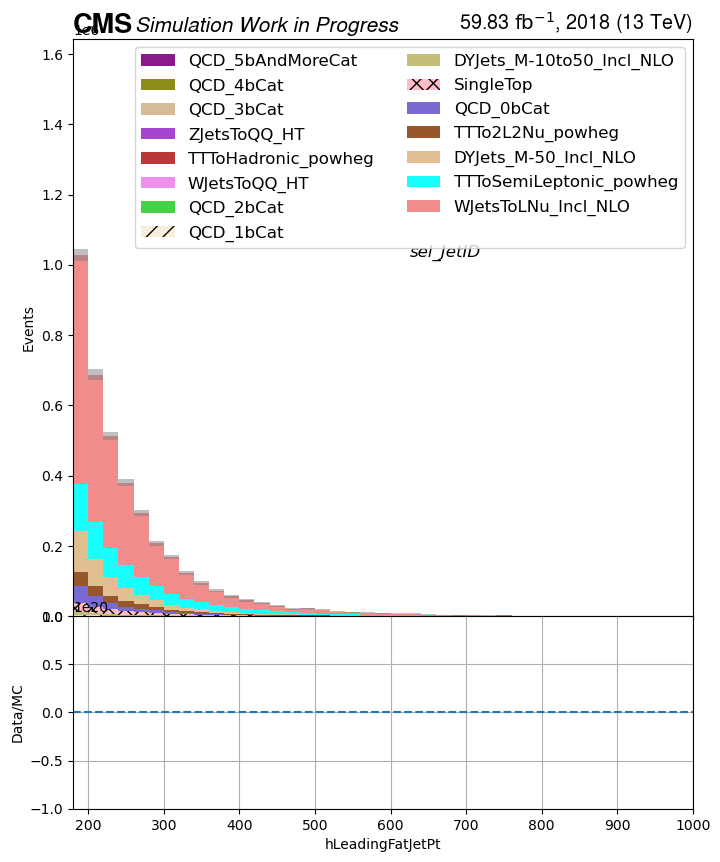

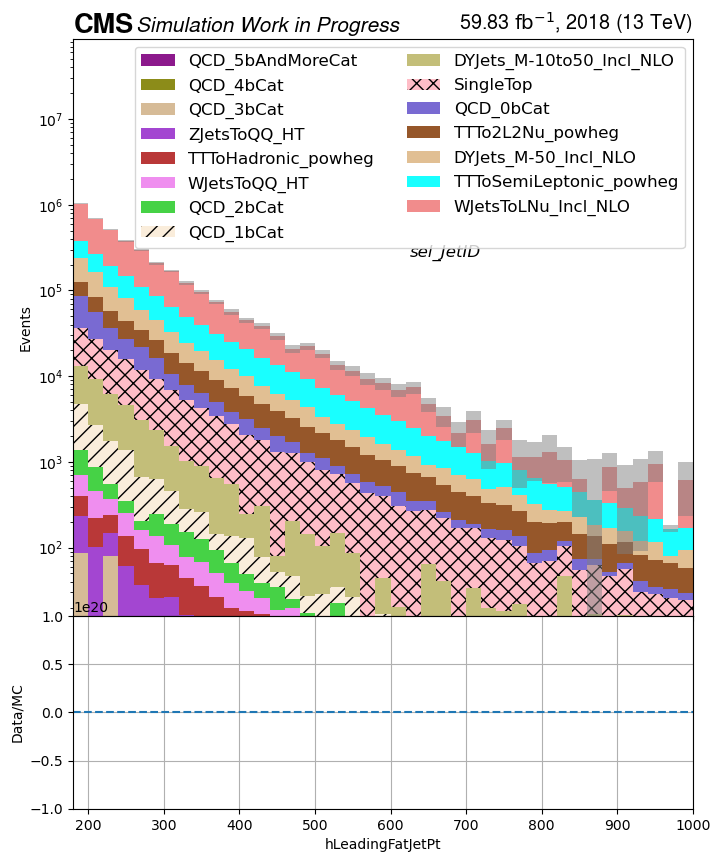

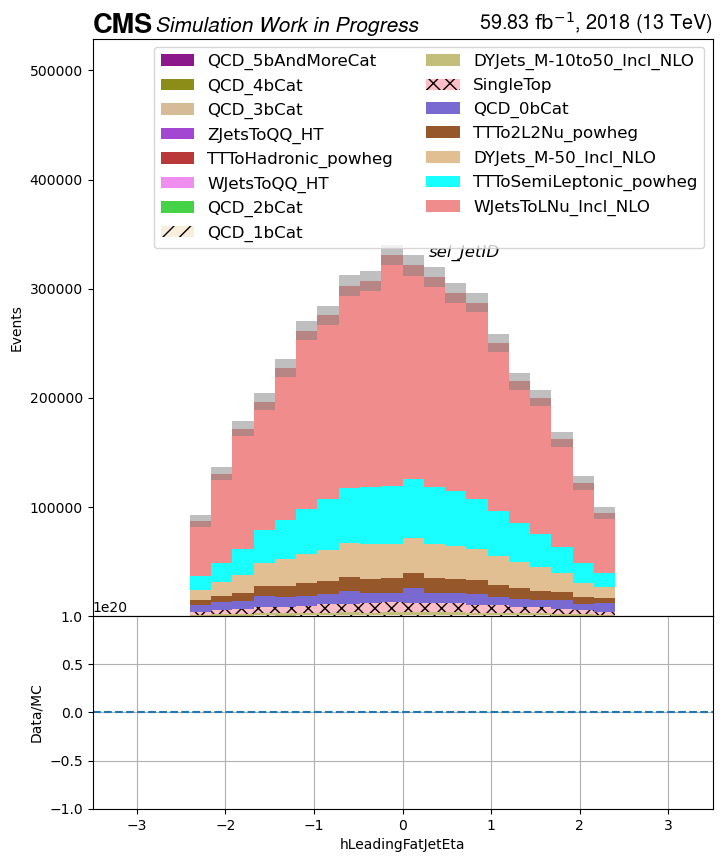

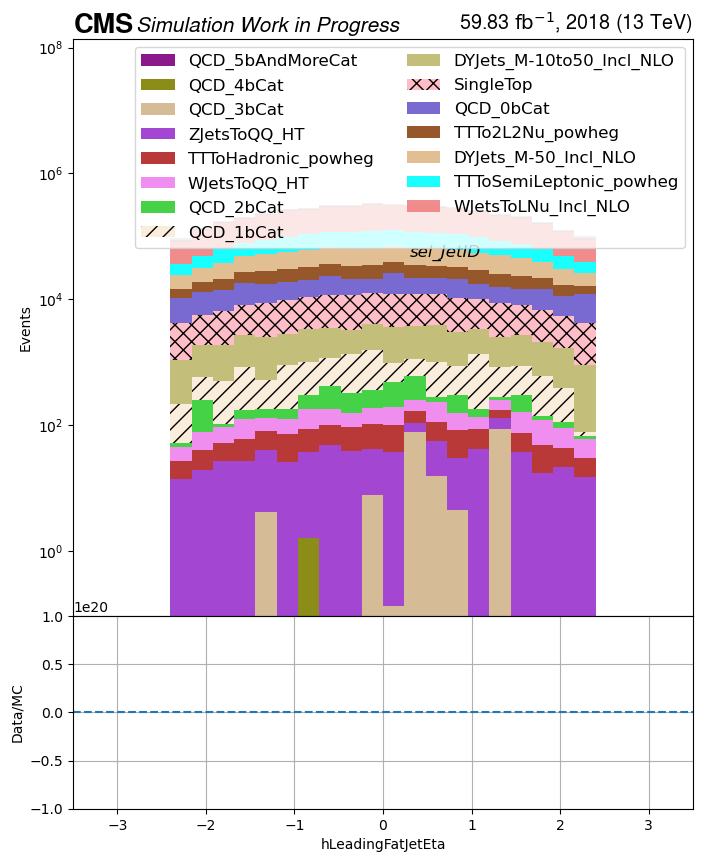

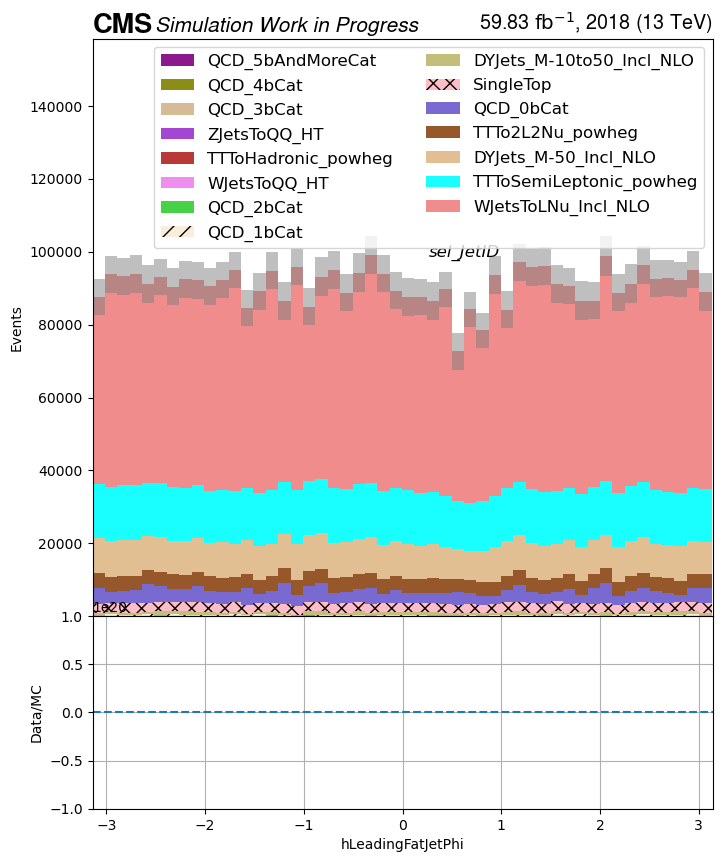

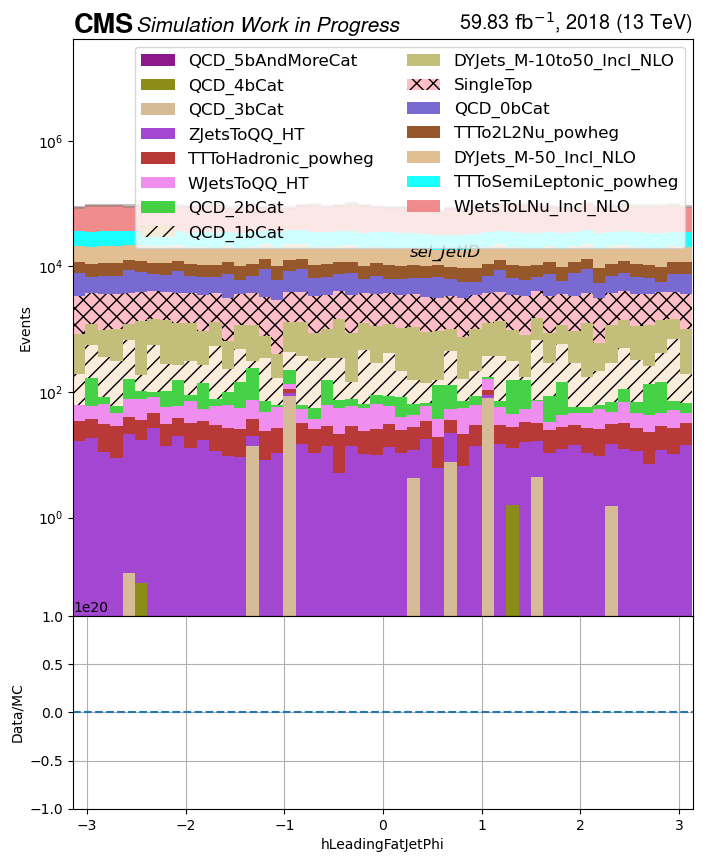

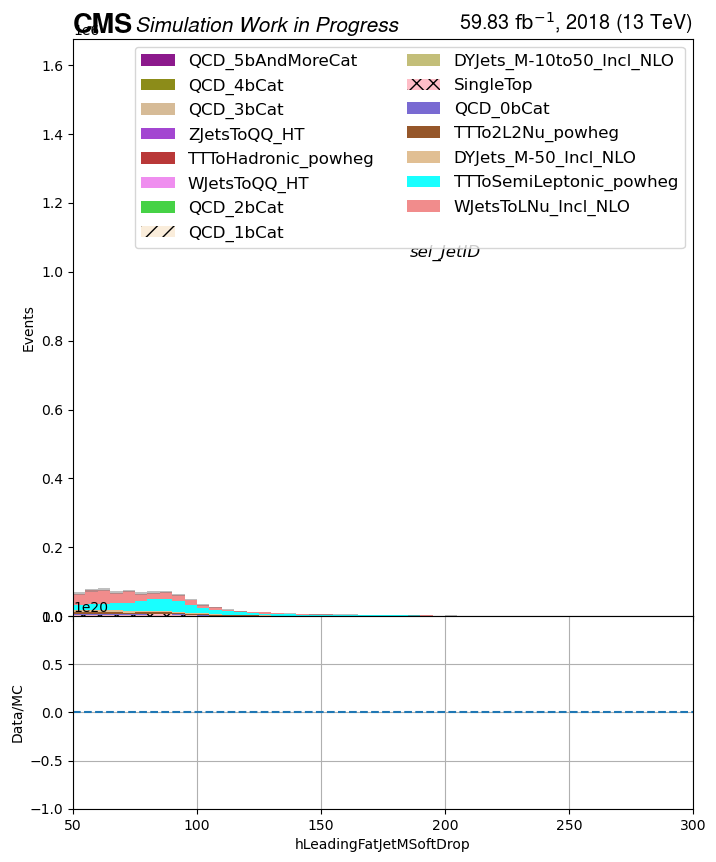

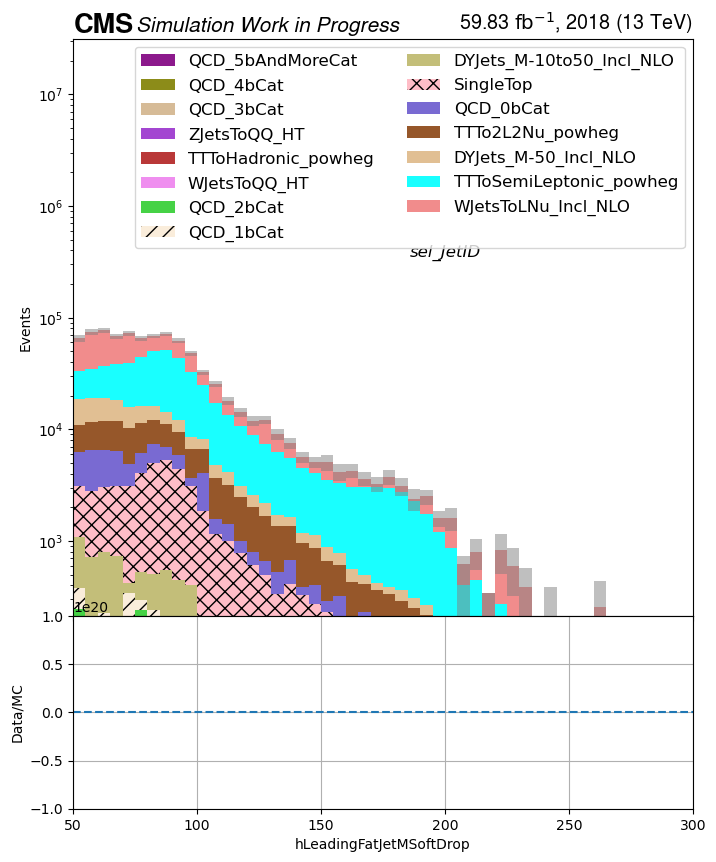

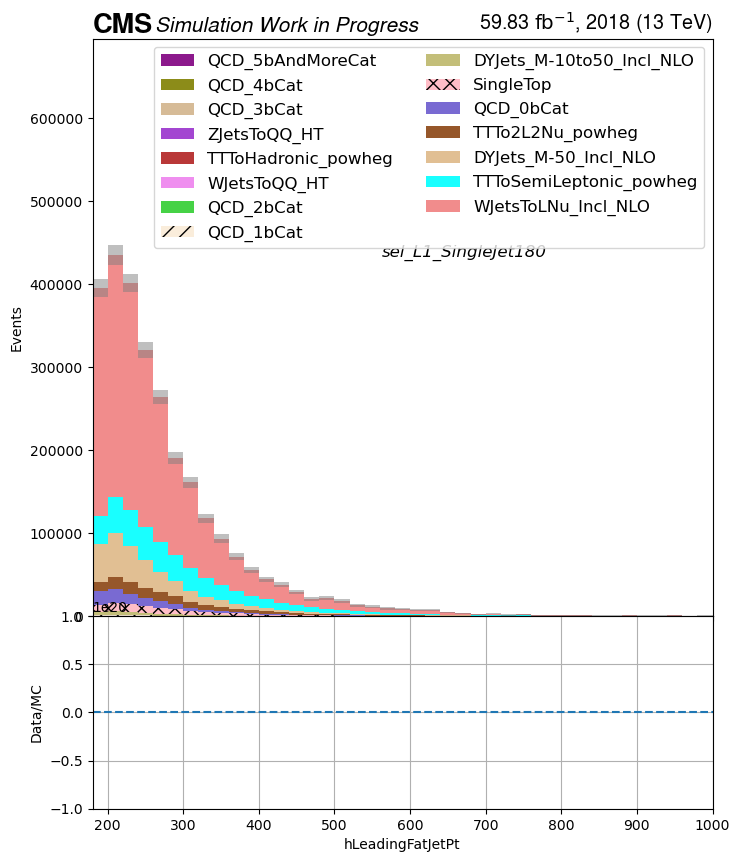

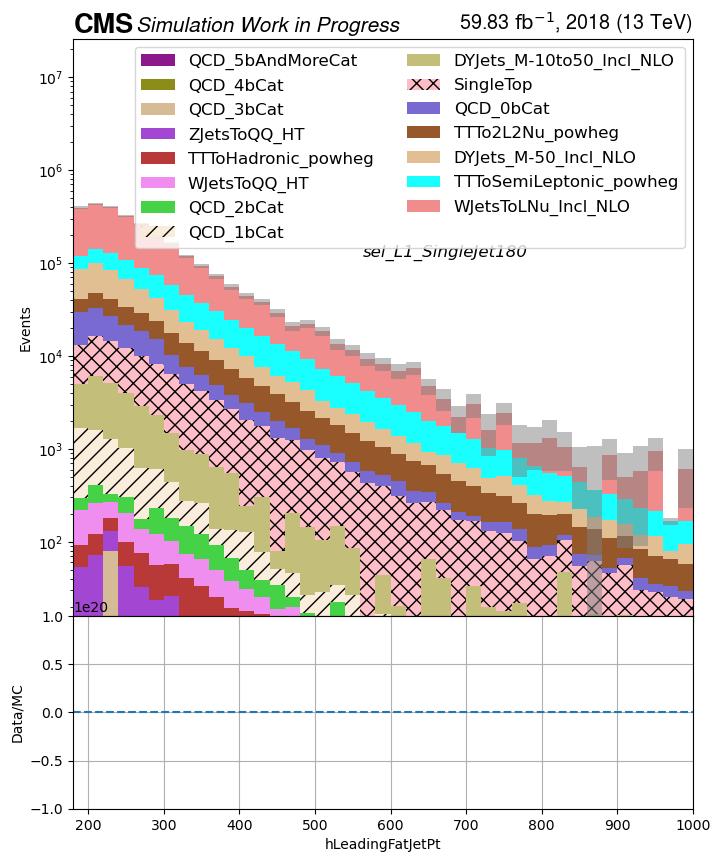

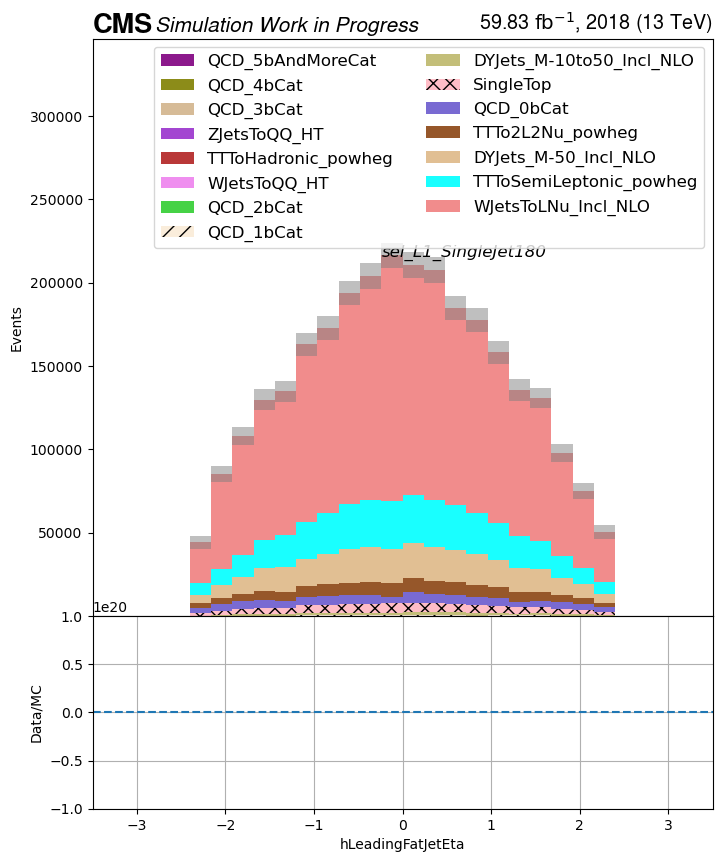

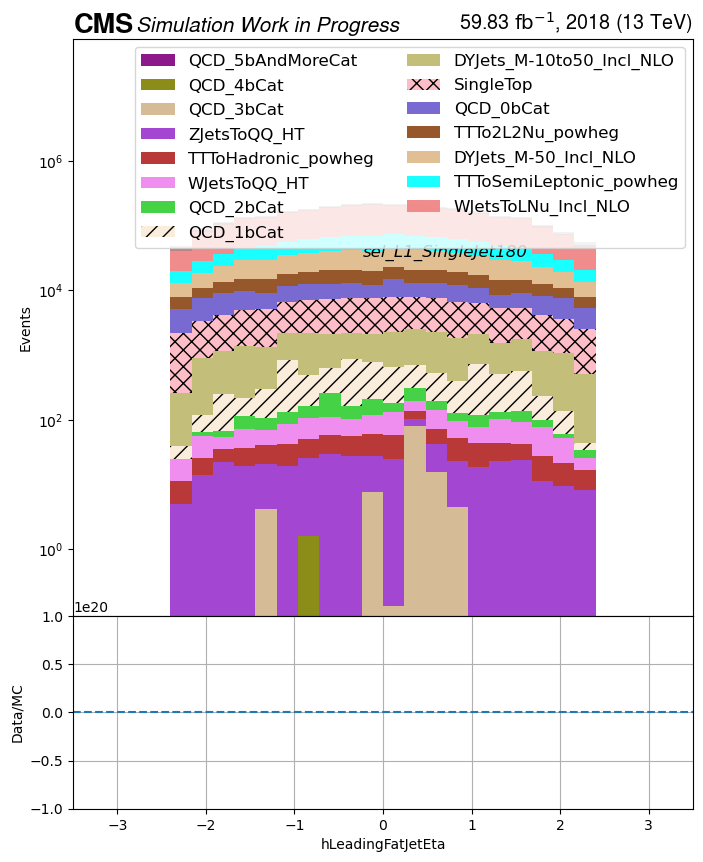

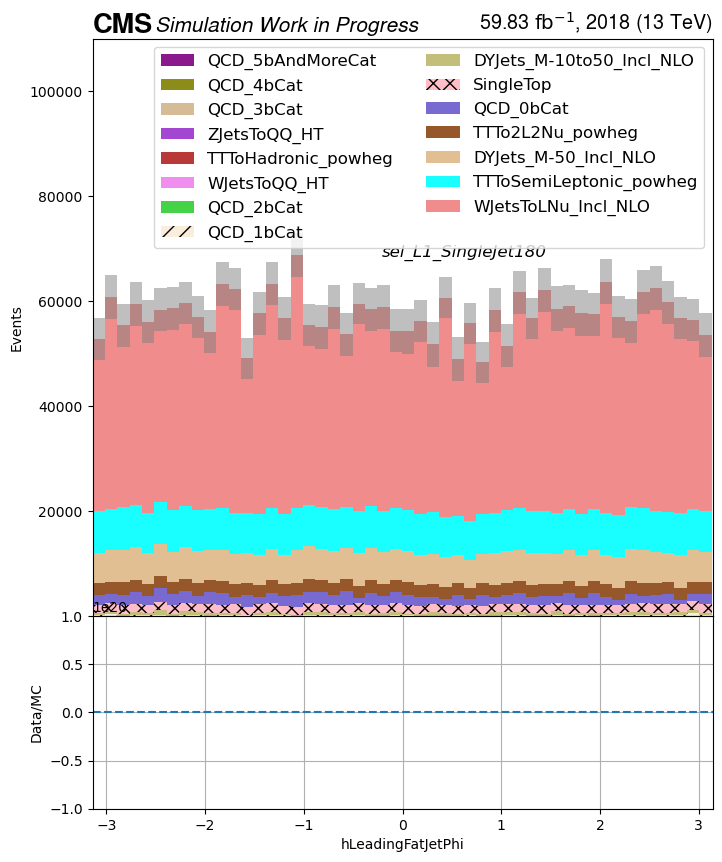

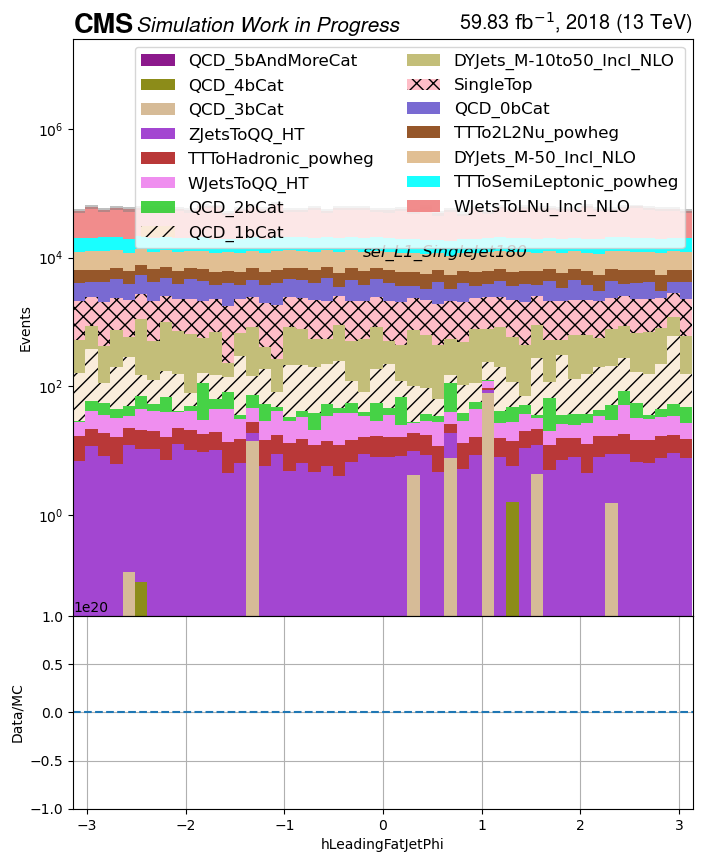

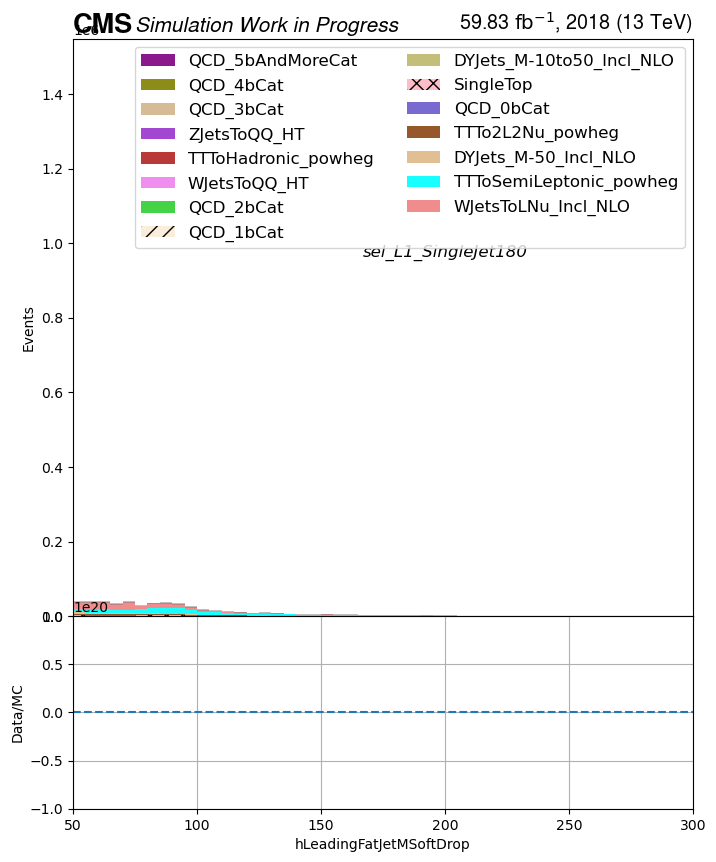

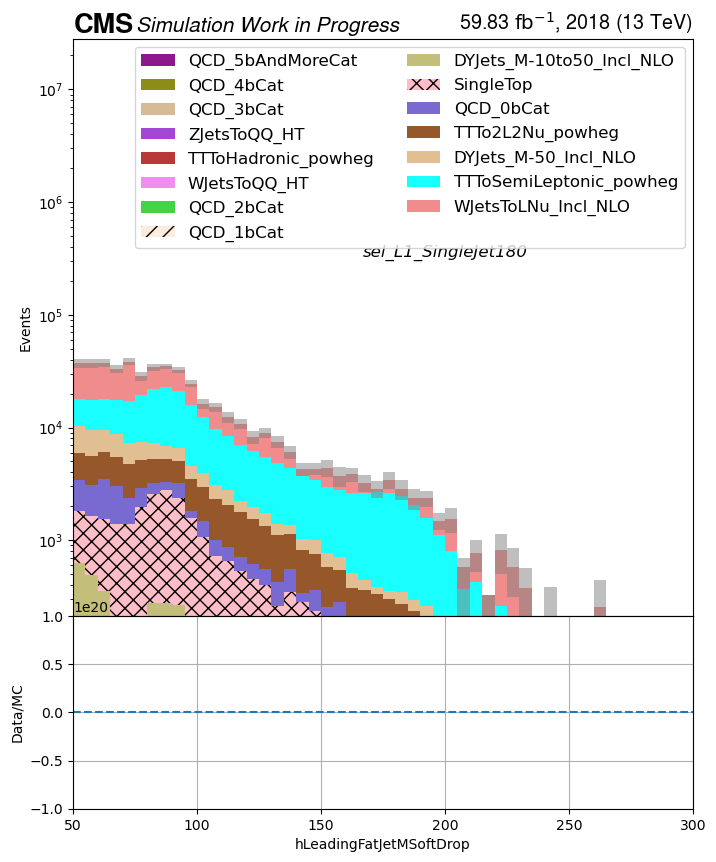

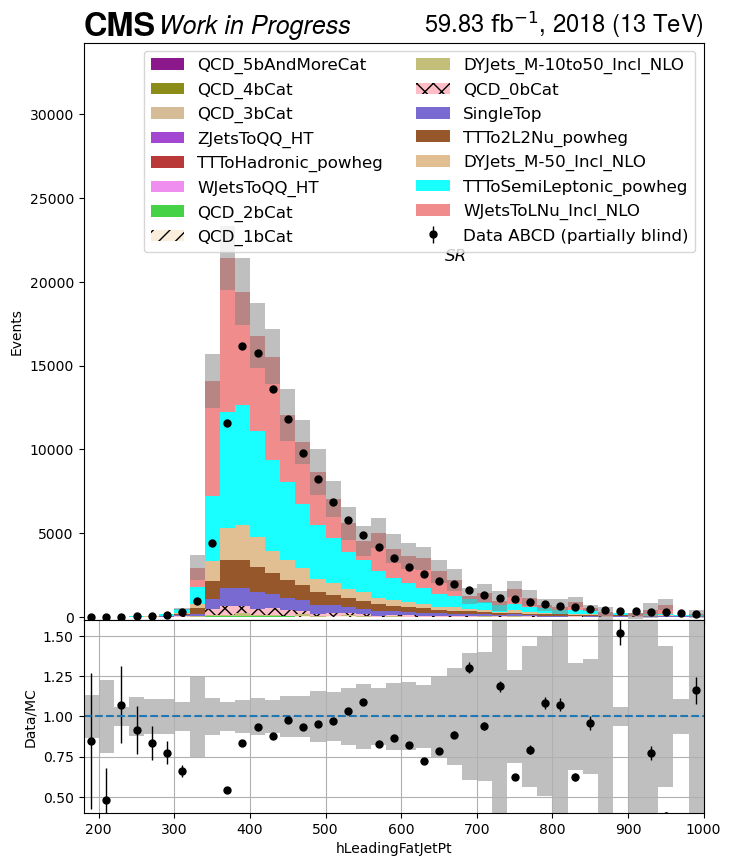

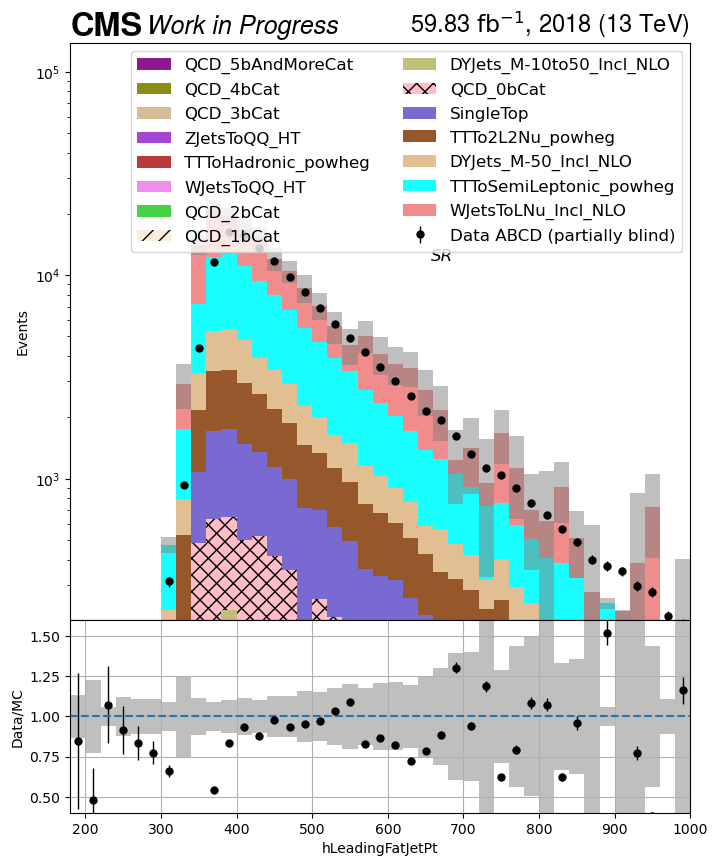

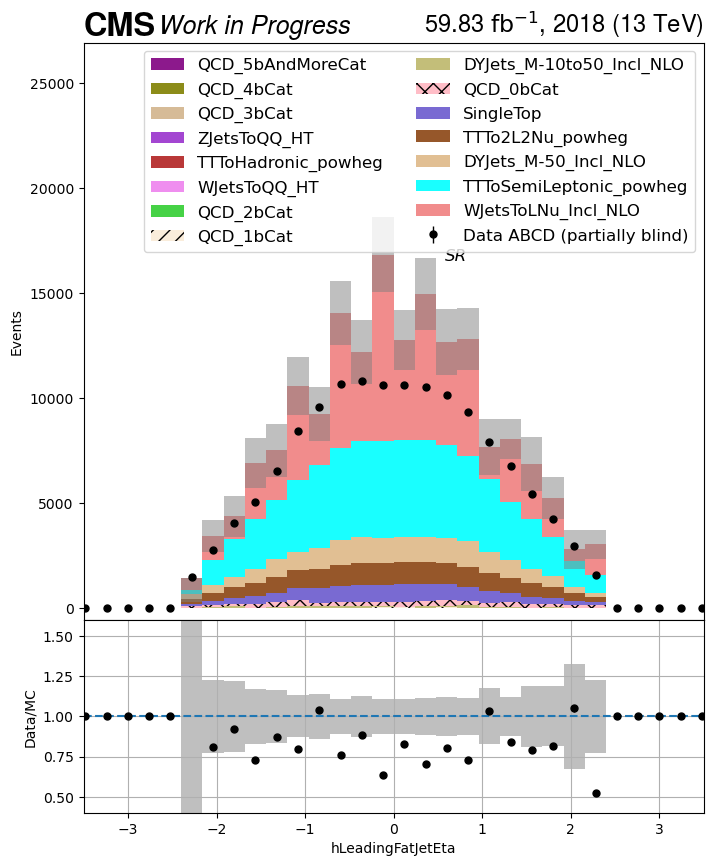

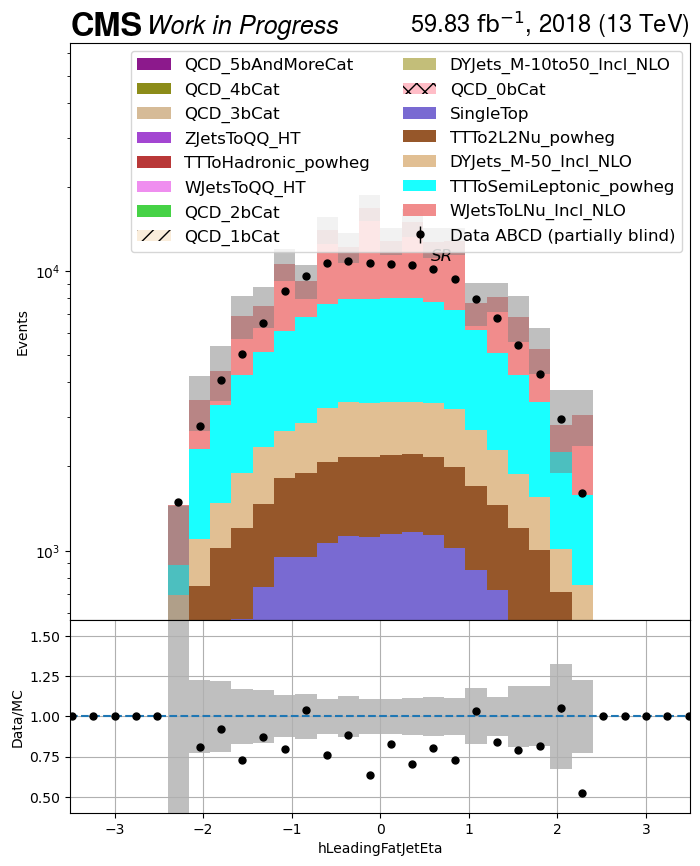

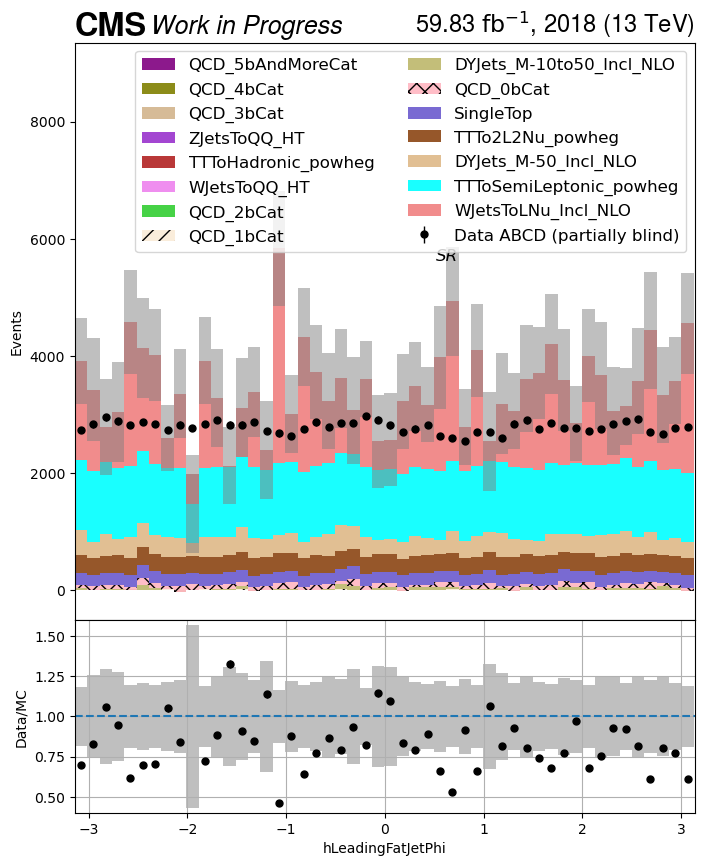

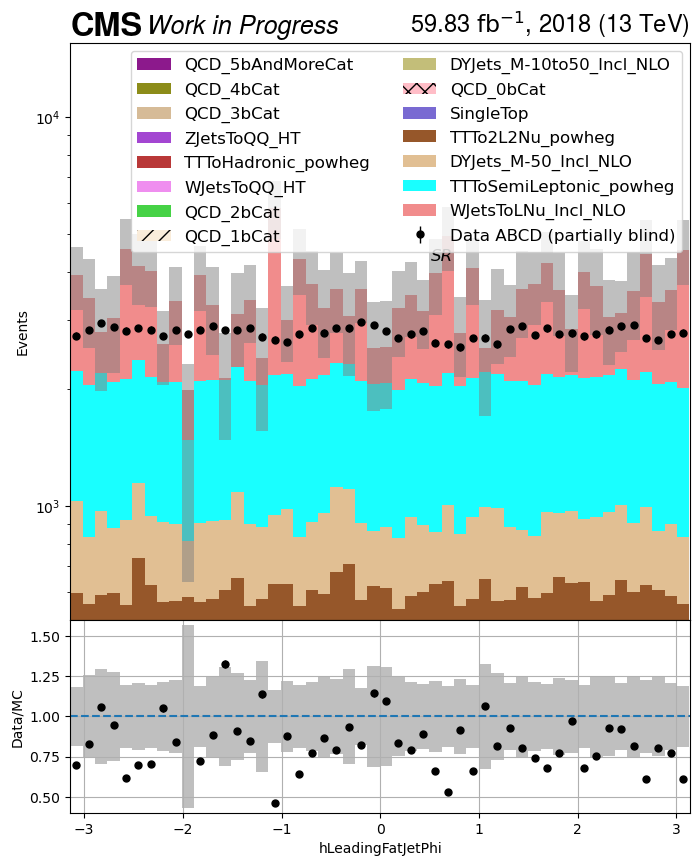

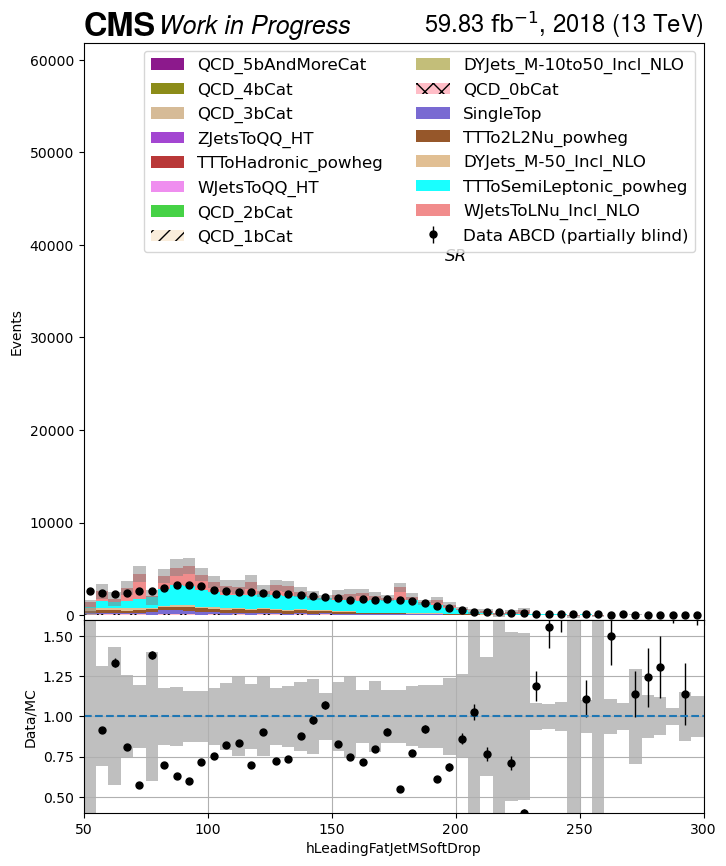

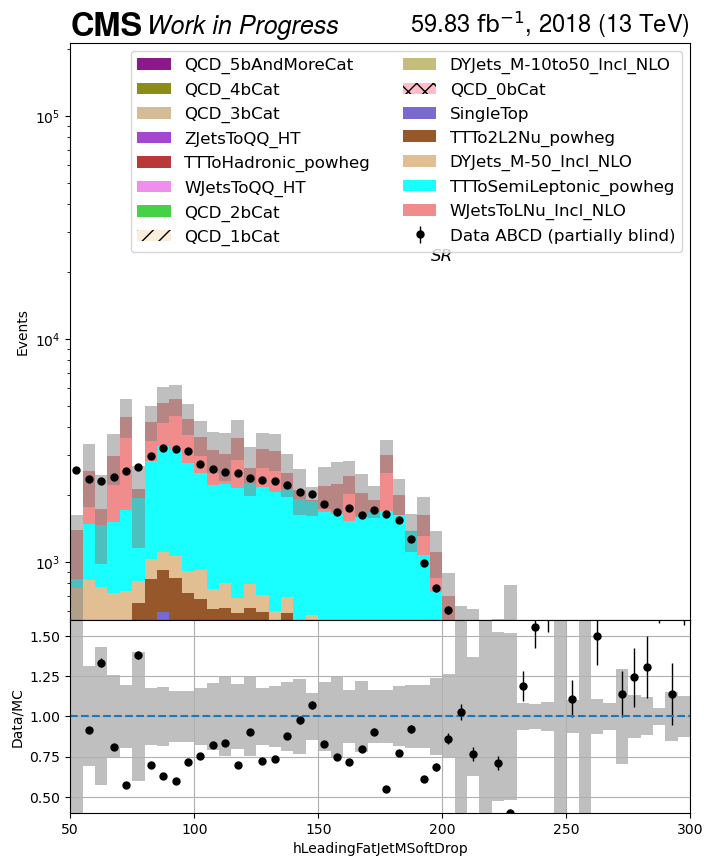

In [7]:
#colors_bkg_list = ['blue', 'orange', 'brown'] # ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"] #['lightcoral', 'burlywood', 'cyan', 'saddlebrown', 'slateblue', 'lightpink', 'darkkhaki', 'antiquewhite', 'limegreen', 'violet', 'firebrick', 'darkorchid', 'tan', 'olive', 'purple']

colors_bkg_list = [ 
    # ['color', <transperent>, '<fill pattern>']
    ['lightcoral', 0.9, ''],
    ['cyan', 0.9, '' ],
    ['burlywood', 0.9, '' ], 
    ['saddlebrown', 0.9, '' ],
    ['slateblue', 0.9, '' ],
    ['lightpink', 0.9, 'xx' ],
    ['darkkhaki', 0.9, '' ],
    ['antiquewhite', 0.9, '//' ],
    ['limegreen', 0.9, '' ],
    ['violet', 0.9, '' ],
    ['firebrick', 0.9, '' ],
    ['darkorchid', 0.9, '' ],
    ['tan', 0.9, '' ],
    ['olive', 0.9, '' ],
    ['purple',  0.9, ''],
]

colors_sig_list = [
    # ['color', <transperent>, '<fill pattern>', ]
    ['blue', 0.9, ''],
    ['red', 0.9, ''],
    ['green', 0.9, ''],
]

for sData, ExpData_list in ExpData_dict.items():
    luminosity_toUse = 0
    for ExpData_component in ExpData_list:
        DatasetEra_         = ExpData_component.split(era)[1][0] # 'JetHT_Run2018A'.split('2018')[1][0]
        luminosity_forEra_  = Luminosities_forGGFMode_perEra[era][HLT_toUse][DatasetEra_]
        luminosity_toUse   += luminosity_forEra_
        print(f"{ExpData_list = }, {DatasetEra_ = }, {luminosity_forEra_ = } ")
    luminosity_Scaling_toUse = round(luminosity_toUse, 2) / round(luminosity_total, 2)
    luminosity_toUse = round(luminosity_toUse, 2)
    print(f"{sData}: {ExpData_list}, {luminosity_toUse = }, {luminosity_total = },  {luminosity_Scaling_toUse = }")

    for selectionTag in selectionTags:    
        dataBlindOption_toUse = dataBlindOption if selectionTag != 'SR' else DataBlindingOptions.BlindPartially
        for histo_name in histograms_dict.keys():
            histo_name_toUse = '%s_%s' % (histo_name, selectionTag)
            for systematic in systematics_list:
                for yAxisScale in ['linearY', 'logY']: # ['linearY', 'logY']
                    xAxisRange = histograms_dict[histo_name][sXRange] if sXRange in histograms_dict[histo_name].keys() else None
                    yAxisRange = histograms_dict[histo_name][sYRange] if sYRange in histograms_dict[histo_name].keys() else None
                    xAxisLabel = histograms_dict[histo_name][sXLabel] if sXLabel in histograms_dict[histo_name].keys() else None
                    yAxisLabel = histograms_dict[histo_name][sYLabel] if sYLabel in histograms_dict[histo_name].keys() else None
                    nRebinX    = histograms_dict[histo_name][sNRebinX] if sNRebinX in histograms_dict[histo_name].keys() else 1
                    nRebinY    = histograms_dict[histo_name][sNRebinY] if sNRebinY in histograms_dict[histo_name].keys() else 1

                    nHistoDimemsions = None
                    yAxisRange_cal      = [1e20, -1e10]
                    yRatioAxisRange_cal = [1e20, -1e10]
                    xError = np.array([])
                    hData = None
                    hBkgTot_values = None
                    hBkgTot_variance = None
                    hStack_values_list = np.array([]) 
                    hStack_edges = np.array([])
                    hStack_centers = np.array([])
                    sStack_list = []
                    nBkgTot = 0
                    significanceAvg = [] #np.array([])



                    print(f"\n\n {histo_name_toUse = }, {systematic = }, {yAxisScale = }, ")
                    #fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'ymargin': 0.4})
                    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
                    #fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(8,10), sharex='col')
                    #print(f"fig: {fig}, axs: {axs}")

                    #fig1, ax1 = plt.subplots()
                    
                    
                    if len(MCBkg_list) > 0:
                        hBkg_list = []
                        sBkg_list = []
                        hBkg_integral_list = []
                        for dataset in MCBkg_list:
                            histo_name_toUse_full = 'evt/%s/%s_%s' % (dataset, histo_name_toUse, systematic)
                            h = fIpFile[histo_name_toUse_full].to_hist()
                            nHistoDimemsions = len(h.axes)
                            if nHistoDimemsions == 2 and yAxisScale == 'logY': break  # No need to plot 2-D hist with logY
                            h = rebinTH1(h, nRebinX) if nHistoDimemsions == 1 else rebinTH2(h, nRebinX, nRebinY)

                            h = h * luminosity_Scaling_toUse

                            nTot_ = h.values().sum()
                            hBkg_list.append(h)
                            sBkg_list.append(dataset)
                            hBkg_integral_list.append(nTot_)

                            if abs(nTot_ - 0) < 1e-10: continue
                            #print(f"{histo_name_toUse_full} integral: {h.values.sum()}")
                            #print(f"{h.axes = }, {len(h.axes) = }")

                            if nHistoDimemsions == 1:
                                yMin_ = getNonZeroMin(h.values())
                                yMax_ = np.max(h.values())
                                if yMin_ < yAxisRange_cal[0]:
                                    yAxisRange_cal[0] = yMin_
                                if yMax_ > yAxisRange_cal[1]:
                                    yAxisRange_cal[1] = yMax_                        

                        # No need to plot 2-D hist with logY
                        if nHistoDimemsions == 2 and yAxisScale == 'logY': 
                            plt.close(fig)
                            continue 


                        # sort histograms in decreasing yield
                        isReverseSortForStack = True
                        idx_hBkg_sortedByIntegral = sorted(range(len(hBkg_integral_list)), key=lambda i: hBkg_integral_list[i], reverse=isReverseSortForStack)            

                        #print(f"sBkg_list: {sBkg_list} \nhBkg_integral_list (total {sum(hBkg_integral_list)}): {hBkg_integral_list} ")
                        #print(f"sBkg_list sorted by integral: {[(sBkg_list[idx], hBkg_integral_list[idx]) for idx in idx_hBkg_sortedByIntegral]}")            

                        hStack_list = [ hBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
                        sStack_list = [ sBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
                        #print(f"sStack_list: {sStack_list}")
                        #print(f"xError ({type(xError)}) ({len(xError)}): {xError}")

                        hStack_values_list    = np.array( [ h.values() for h in hStack_list ] )
                        hStack_variance_list  = np.array( [ h.variances() for h in hStack_list ] )
                        hStack_error_list     = np.array( [ np.sqrt(h.variances()) for h in hStack_list ] )
                        #print(f"{len(hStack_list) = }"); sys.stdout.flush()
                        hStack_edges          = hStack_list[0].axes[0].edges
                        hStack_centers        = hStack_list[0].axes[0].centers
                        xError                = (hStack_list[0].axes[0].edges[1:] - hStack_list[0].axes[0].edges[0:-1]) / 2 if len(xError) == 0 else xError

                        hBkgTot_values        = np.sum(hStack_values_list, axis=0)
                        hBkgTot_variance      = np.sum(hStack_variance_list, axis=0)
                        #print(f"hBkgTot_values sum: {sum(hBkgTot_values)}")

                        # Update yRange for hStackBkg -------
                        if nHistoDimemsions == 1:
                            yMin_ = getNonZeroMin(hBkgTot_values)
                            yMax_ = np.max(hBkgTot_values)
                            if yMin_ < yAxisRange_cal[0]:
                                yAxisRange_cal[0] = yMin_
                            if yMax_ > yAxisRange_cal[1]:
                                yAxisRange_cal[1] = yMax_    

                        nHists = len(MCBkg_list)
                        colors_toUse = [ colors_bkg_list[i][0] for i in range(nHists) ]
                        alpha_toUse  = [ colors_bkg_list[i][1] for i in range(nHists) ]
                        hatch_toUse  = [ colors_bkg_list[i][2] for i in range(nHists) ]

                        # plot stack
                        #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], yerr=hStack_error_list, histtype='fill', stack=True, label=sStack_list, sort='yield')
                        #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], yerr=hStack_error_list, histtype='step', stack=True, label=sStack_list, linestyle="--", color=["green", "black", (1, 0, 0, 0.4)])
                        #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], histtype='fill', stack=True, label=sStack_list, color=["green", "darkorange", "red"])

                        # https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
                        
                        if nHistoDimemsions == 1: # 1-D histogram
                            hep.histplot(
                                hStack_values_list, 
                                bins=hStack_edges, 
                                ax=ax[0], 
                                histtype='fill', 
                                stack=True, 
                                label=sStack_list, 
                                color=colors_toUse,
                                alpha=alpha_toUse,
                                hatch=hatch_toUse,
                                sort='yield'
                                )

                            # plot total background
                            #hep.histplot(hBkgTot_values, bins=hStack_edges, ax=ax, yerr=np.sqrt(hBkgTot_variance), histtype='errorbar', color='grey', label='Total background')
                            
                            # plot totoal background error bars only
                            make_error_boxes(
                                ax=ax[0], 
                                xdata=hStack_centers, 
                                ydata=hBkgTot_values, 
                                xerror=xError, 
                                yerror=np.sqrt(hBkgTot_variance), 
                                facecolor='grey',
                                edgecolor='none', 
                                alpha=0.5
                                )
                            
                        elif nHistoDimemsions == 2 and 1==0: # 2-D histogram  
                            #print(f"{list(hStack_list[0].values()) = }, \n{hStack_list[0].variances() = }, ")
                            #print(f"{getNonZeroMin(h.values()) = }")
                            hep.hist2dplot(
                                hBkgTot_values,
                                xbins=hStack_list[0].axes[0].edges,
                                ybins=hStack_list[0].axes[1].edges,
                                #labels='Bkg_total',
                                cmin=getNonZeroMin(hStack_list[0].values()),
                                ax=ax[0]
                            )   
                        
                        # No. of events in total background
                        nBkgTot = np.sum(hBkgTot_values)


                        '''
                        if 1==1:
                            if xAxisRange: ax[0].set_xlim(xAxisRange[0], xAxisRange[1])
                            if yAxisRange: ax[0].set_ylim(yAxisRange[0], yAxisRange[1])
                            else:          ax[0].set_ylim(yAxisRange_cal[0], yAxisRange_cal[1])
                            if xAxisLabel: ax[0].set_xlabel(xAxisLabel)
                            if yAxisLabel: ax[0].set_ylabel(yAxisLabel)
                        '''
                    #print(f"\nAfter MCBkg {yAxisRange_cal = }")




                    if len(MCSig_list) > 0:
                        hSig_list = []
                        sSig_list = []
                        hSig_integral_list = []
                        for iSig, dataset in enumerate(MCSig_list):
                            histo_name_toUse_full = 'evt/%s/%s_%s' % (dataset, histo_name_toUse, systematic)
                            h = fIpFile[histo_name_toUse_full].to_hist()
                            h = rebinTH1(h, nRebinX) if nHistoDimemsions == 1 else rebinTH2(h, nRebinX, nRebinY)

                            h = h * luminosity_Scaling_toUse

                            nTot_ = h.values().sum()
                            hSig_list.append(h)
                            sSig_list.append(dataset)
                            hSig_integral_list.append(h.values().sum())
                            #print(f"{histo_name_toUse_full} integral: {h.values().sum()}")

                            histo_edges = h.axes[0].edges
                            xError      = (h.axes[0].edges[1:] - h.axes[0].edges[0:-1]) / 2 if len(xError) == 0 else xError


                            label_MCSig = dataset
                            label_MCSig = sLableSig[iSig]
                            if scale_MCSig > 1:
                                #label_MCSig = '%s x %d' % (dataset, scale_MCSig)
                                label_MCSig = '%s x %d' % (label_MCSig, scale_MCSig)
                                
                            if nHistoDimemsions == 1:
                                yMin_ = getNonZeroMin(h.values())
                                yMax_ = np.max(h.values())
                                if yMin_ < yAxisRange_cal[0]:
                                    yAxisRange_cal[0] = yMin_
                                if yMax_ > yAxisRange_cal[1]:
                                    yAxisRange_cal[1] = yMax_                        

                            # plot signal
                            if nHistoDimemsions == 1:
                                hep.histplot(
                                    h.values() * scale_MCSig, 
                                    bins=histo_edges, 
                                    ax=ax[0], 
                                    yerr=np.sqrt(h.variances()) * scale_MCSig, 
                                    histtype='errorbar', 
                                    label=label_MCSig,
                                    color=colors_sig_list[iSig][0],                             
                                    marker='o',
                                    markerfacecolor=colors_sig_list[iSig][0],
                                    markersize=3
                                    )

                            nSig = np.sum(h.values())
                            # S/sqrt(B)
                            if nSig > 0 and nBkgTot > 0:
                                S_ = h.values() / nSig
                                B_ = np.sqrt(hBkgTot_values / nBkgTot)
                                significance_i = np.divide(S_, B_, where=B_!=0, out=np.zeros(B_.shape))
                                significanceAvg.append(significance_i)

                                #ax1.plot(h.axes[0].centers, significance_i)

                        significanceAvg = np.array(significanceAvg)
                        significanceAvg = np.sum(significanceAvg, axis=0)
                        significanceAvg = np.divide(significanceAvg, len(MCSig_list) )
                        #print(f"significanceAvg (max: {np.max(significanceAvg)}): {significanceAvg}")




                    #print(f"\nAfter MCSig {yAxisRange_cal = }")
                    
                    if dataBlindOption_toUse in [DataBlindingOptions.Unblind, DataBlindingOptions.BlindPartially]: #sData:
                        hData = None
                        for ExpData_component in ExpData_list:
                            histo_name_toUse_full = 'evt/%s/%s_%s' % (ExpData_component, histo_name_toUse, systematics_forData)
                            h = fIpFile[histo_name_toUse_full].to_hist()
                            if hData == None: hData = h
                            else:             hData = hData + h

                        hData = rebinTH1(hData, nRebinX) if nHistoDimemsions == 1 else rebinTH2(hData, nRebinX, nRebinY)
                        xError = (hData.axes[0].edges[1:] - hData.axes[0].edges[0:-1]) / 2

                        if nHistoDimemsions == 1:
                            yMin_ = getNonZeroMin(hData.values())
                            yMax_ = np.max(hData.values())
                            if yMin_ < yAxisRange_cal[0]:
                                yAxisRange_cal[0] = yMin_
                            if yMax_ > yAxisRange_cal[1]:
                                yAxisRange_cal[1] = yMax_
                            #print(f"Data: {yMin_ = }, {yMin_}")

                        hData_values_toUse = hData.values()
                        hData_errors_toUse = np.sqrt(hData.variances())

                        # blind data with high S/sqrt(B) bins
                        #print(f"{len(significanceAvg) = }")
                        if dataBlindOption_toUse in [DataBlindingOptions.BlindPartially] and \
                            len(significanceAvg):
                            # inflate significantThshForDataBlinding for higher S/sqrt(B) when histogram is rebinned, 
                            # so that blinding of data is independent of rebinning
                            significantThshForDataBlinding_toUse = significantThshForDataBlinding * math.sqrt(nRebinX)
                            hData_values_toUse = np.where(
                                (significanceAvg > significantThshForDataBlinding_toUse),
                                np.full(len(hData_values_toUse), 0),
                                hData_values_toUse
                            )
                            hData_errors_toUse = np.where(
                                (significanceAvg > significantThshForDataBlinding_toUse),
                                np.full(len(hData_values_toUse), 0),
                                hData_errors_toUse
                            )
                            #print(f"{(significanceAvg > significantThshForDataBlinding) =}")
                            #print(f"hData_values_toUse ({len(hData_values_toUse)}): {hData_values_toUse}")

                        if nHistoDimemsions == 1:
                            #hep.histplot(hData.values(), bins=hData.axes[0].edges, ax=ax[0], yerr=np.sqrt(hData.variances()), histtype='errorbar', color='black', label='Data')
                            hep.histplot(
                                hData_values_toUse, 
                                bins=hData.axes[0].edges, 
                                ax=ax[0], 
                                yerr=hData_errors_toUse, 
                                histtype='errorbar', 
                                color='black', 
                                label='%s %s' % (sData, dataBlindOption_toUse.value)
                                )
                        elif nHistoDimemsions == 2 and 1==0: # 2-D histogram  
                            hep.hist2dplot(
                                hData_values_toUse,
                                xbins=hData.axes[0].edges,
                                ybins=hData.axes[1].edges,
                                #labels='Bkg_total',
                                cmin=getNonZeroMin(hData_values_toUse),
                                ax=ax[1]
                            )                                              

                        #print(f"hData integral: {hData.values().sum()}")


                        # Ratio plot ---------------------------------------------------------                
                        ratio_values = np.divide(hData_values_toUse, hBkgTot_values, where=hBkgTot_values!=0, out=np.ones(hData.shape))
                        ratio_error  = hData_errors_toUse            
                        ratio_error  = np.divide(ratio_error, hBkgTot_values, where=hBkgTot_values!=0, out=np.zeros(hData.shape))
                        ratio_syst   = np.sqrt(hBkgTot_variance)
                        ratio_syst   = np.divide(ratio_syst, hBkgTot_values, where=hBkgTot_values!=0, out=np.zeros(hData.shape))

                        print(f"ratio_values ({ratio_values.shape}): {ratio_values}")
                        if nHistoDimemsions == 1:
                            yMin_ = getNonZeroMin( ratio_values - ratio_error)
                            yMax_ = np.max( ratio_values + ratio_error)
                            if yMin_ < yRatioAxisRange_cal[0]:
                                yRatioAxisRange_cal[0] = yMin_
                            if yMax_ > yRatioAxisRange_cal[1]:
                                yRatioAxisRange_cal[1] = yMax_                          
                        
                        if nHistoDimemsions == 1:
                            hep.histplot(
                                ratio_values, 
                                bins=hData.axes[0].edges, 
                                ax=ax[1], 
                                yerr=ratio_error, 
                                histtype='errorbar', 
                                color='black', 
                                label='Data'
                                )
                            #if xAxisRange: ax[1].set_xlim(xAxisRange[0], xAxisRange[1])

                            # plot totoal background error bars only for ratio plot
                            make_error_boxes(
                                ax=ax[1], 
                                xdata=hData.axes[0].centers, 
                                ydata=np.full(len(hData.axes[0].centers), 1), 
                                xerror=xError, 
                                yerror=ratio_syst, 
                                facecolor='grey',
                                edgecolor='none', 
                                alpha=0.5
                                )
                            
                        elif nHistoDimemsions == 2: # 2-D histogram  
                            hep.hist2dplot(
                                ratio_values,
                                xbins=hData.axes[0].edges,
                                ybins=hData.axes[1].edges,
                                #labels='Bkg_total',
                                cmin=yRatioLimit[0], cmax=yRatioLimit[1],
                                ax=ax[0]
                            )   


                    
                    # Upper plot cosmetics ---------
                    if xAxisRange: ax[0].set_xlim(xAxisRange[0], xAxisRange[1])
                    print(f"\nAt the end {yAxisRange_cal = }")
                    if yAxisRange: ax[0].set_ylim(yAxisRange[0], yAxisRange[1])
                    elif nHistoDimemsions == 1:          
                        yMaxOffset = 10**(math.log10(yAxisRange_cal[1] / abs(yAxisRange_cal[0])) * 0.4) if yAxisScale == 'logY' else 1.6
                        #print(f"{yMaxOffset = }, {yAxisRange_cal[1] * yMaxOffset = }, \t\t {abs(yAxisRange_cal[0]) * logYMinScaleFactor = }")
                        if yAxisScale == 'logY':
                            yAxisRange_cal[0] = abs(yAxisRange_cal[0]) * logYMinScaleFactor
                            yAxisRange_cal[1] = yAxisRange_cal[1] * yMaxOffset
                        else:
                            yAxisRange_cal[0] = yAxisRange_cal[0]
                            yAxisRange_cal[1] = yAxisRange_cal[1] * yMaxOffset
                        print(f"\nAt the end updated {yAxisRange_cal = } \t {yAxisScale = }")
                        ax[0].set_ylim(yAxisRange_cal[0], yAxisRange_cal[1])
                    if xAxisLabel: ax[0].set_xlabel(xAxisLabel)
                    if yAxisLabel: ax[0].set_ylabel(yAxisLabel)                
                    ax[0].legend(fontsize=12, loc='upper right', ncol=2)

                    if yAxisScale == 'logY': ax[0].set_yscale('log', base=10)
                    #ax[0].set_ymargin(1.)

                    # Ratio plot cosmetics ---------
                    if yRatioAxisRange_cal[0] < yRatioLimit[0]: yRatioAxisRange_cal[0] = yRatioLimit[0]
                    if yRatioAxisRange_cal[1] > yRatioLimit[1]: yRatioAxisRange_cal[1] = yRatioLimit[1]
                    yRatioAxisRange_cal_maxDeviation = max(abs(yRatioAxisRange_cal[0] - 1), abs(yRatioAxisRange_cal[1] - 1))
                    yRatioAxisRange_cal[0] = 1 - yRatioAxisRange_cal_maxDeviation
                    yRatioAxisRange_cal[1] = 1 + yRatioAxisRange_cal_maxDeviation
                    if xAxisRange: ax[1].set_xlim(xAxisRange[0], xAxisRange[1]) 
                    ax[1].set_ylim(yRatioAxisRange_cal[0], yRatioAxisRange_cal[1])
                    print(f"{yRatioAxisRange_cal = }") 

                    if xAxisLabel: ax[1].set_xlabel(xAxisLabel)
                    ax[1].set_ylabel('Data/MC')
                    
                    ax[1].axhline(y=1, linestyle='--')
                    ax[1].grid()

                    

                    isData = True if dataBlindOption_toUse != DataBlindingOptions.BlindFully else False
                    fontsize_toUse = 18 if isData else 15
                    hep.cms.label(ax=ax[0], data=isData, year=era, lumi=luminosity_toUse, label=cmsWorkStatus, fontsize=fontsize_toUse)

                    ax[0].text(0.6, 0.63, selectionTag,
                            fontsize=12, fontstyle='italic',
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform=ax[0].transAxes
                                )

                    fig.savefig('%s/%s_%s_%s_%s.png' % (sOpDir,histo_name_toUse,systematic,sData, yAxisScale), transparent=False, dpi=80, bbox_inches="tight")

                    #plt.close(fig)